## Observations and Insights 

In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
united_mouse_df = mouse_metadata.merge(study_results, how='left', on='Mouse ID', sort=False)

# Display the data table for preview
final_mouse_df = united_mouse_df.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume'})
final_mouse_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [55]:
# Checking the number of mice.
mouse_count = united_mouse_df["Mouse ID"].count()
mouse_count


1893

In [56]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = united_mouse_df[united_mouse_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_rows


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [57]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_rows = united_mouse_df[united_mouse_df.duplicated(['Mouse ID',])]
all_duplicate_rows


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [58]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = united_mouse_df.drop_duplicates("Mouse ID")
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [59]:
# Checking the number of mice in the clean DataFrame. 
#data composed of 249 mouses accordighly to table above. 

## Summary Statistics

In [60]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = united_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = united_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = united_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = united_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = united_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
anotherone = united_mouse_df.groupby('Drug Regimen')
first = anotherone.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
first


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

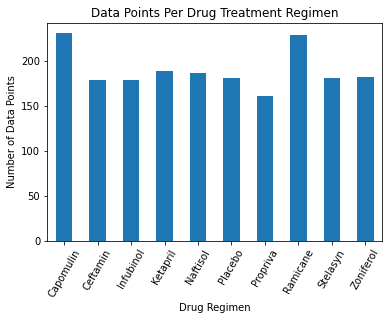

In [62]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
data_points = united_mouse_df.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
pan_bar = pd.DataFrame(data_points)
#plot bar
also = pan_bar.plot.bar(legend=False,rot=60)
also
plt.ylabel("Number of Data Points")
plt.title("Data Points Per Drug Treatment Regimen")
plt.savefig('barplot1')


In [63]:

pan_bar.head()

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186


In [64]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drug_list = summary_df.index.tolist()
drug_list


['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [65]:
drug_count = (united_mouse_df.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
drug_count

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

Text(0, 0.5, 'Count')

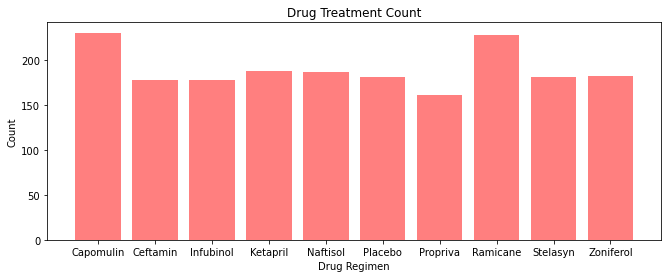

In [66]:
#Assign x-axis
x_axis = drug_list
#Creating and customizing bar chart
plt.figure(figsize=(11,4))
plt.bar(x_axis, drug_count, color='r', alpha=0.5, align="center")

plt.title("Drug Treatment Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

In [67]:
plt.clf()
plt.cla()
plt.close()

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#data_points = merged_df.groupby('Drug Regimen').count()

bygender = mouse_metadata.groupby("Sex").count()
bygender

,Mouse ID,Drug Regimen,Age_months,Weight (g)
Sex,,,,
Female,124,124,124,124
Male,125,125,125,125


In [69]:
labels = [mouse_metadata['Sex'].unique()]
newrecord = list(bygender.index)
newrecord

['Female', 'Male']

In [70]:
sizes = [bygender["Mouse ID"]]
sizes

[Sex
 Female    124
 Male      125
 Name: Mouse ID, dtype: int64]

In [71]:
gender_df = pd.DataFrame(united_mouse_df.groupby(["Sex"]).count()).reset_index()
gender_df.head()

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [72]:
#Adjust  dataframe down to two columns
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df.head()

,Sex,Mouse ID
0,Female,935
1,Male,958


Text(0, 0.5, '')

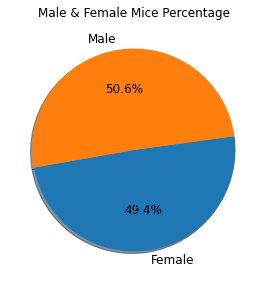

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
plt.figure(figsize=(10,7))
ax1 = plt.subplot(121, aspect="equal")
gender_df.plot(kind="pie", y = "Mouse ID", ax=ax1, autopct='%1.1f%%',
              startangle=190, shadow=True, labels=gender_df["Sex"], legend = False, fontsize=12)

plt.title("Male & Female Mice Percentage")
plt.xlabel("")
plt.ylabel("")

In [74]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = (united_mouse_df.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count 

[935, 958]

In [75]:
#Adding details to the pie chart
labels = ["Females", "Males"]
colors = ["yellow", "blue"]
explode = (0.1, 0)

(-1.1022210380848287,
 1.1046567928362272,
 -1.210153727244294,
 1.1077121695699783)

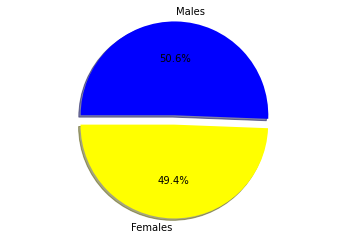

In [76]:
#creating the pie chart
plt.pie(gender_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=900)
plt.axis("equal")

In [77]:
plt.clf()
plt.cla()
plt.close()

## Quartiles, Outliers and Boxplots

In [78]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens(Capomulin, Ramicane, Infubinol, and Ceftamin). Calculate the IQR and quantitatively determine if there are any potential outliers.

#Calculating primeRegimens
prime_regimes = final_mouse_df[final_mouse_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
prime_regimes = best_regimes.sort_values(["Timepoint"], ascending=True)
prime_regimes

#Getting a smaller DF to work with
prime_regimes_data = best_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume"]]

prime_regimes_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


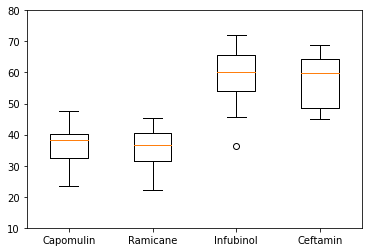

In [79]:
#GroupBy Regimen and Mouse ID 
prime_regimens_sort = prime_regimes_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume']
prime_regimens_sort.head()

# Turn collected data into df 
prime_regimen_df = prime_regimens_sort.to_frame()
prime_regimen_df

#generate a list to use as df and lables
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_df = prime_regimen_df.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume']]
plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(10, 80)
plt.show()
    

## Line and Scatter Plots

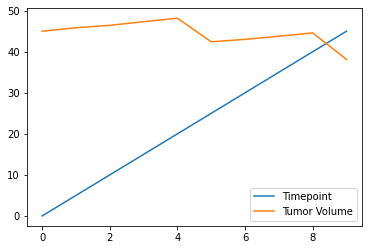

In [80]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Assign time_vs_tumor variable
tumor_vs_time = final_mouse_df[final_mouse_df["Mouse ID"].isin(["j119"])]
tumor_vs_time

#generate  df for the data
tumor_vs_time_data = tumor_vs_time[["Mouse ID", "Timepoint", "Tumor Volume"]]
tumor_vs_time_data

#Reseting Index on that Df
line_plot_df = tumor_vs_time_data.reset_index()
line_plot_df

#Regenerating df post reseting the index
line_plot_final = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume"]]
line_plot_final

#Plotting line
lines = line_plot_final.plot.line()

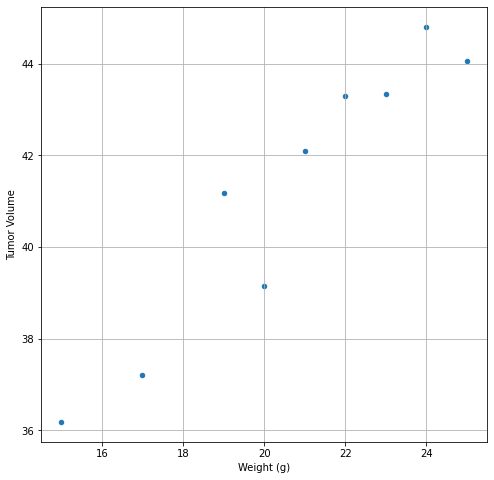

In [81]:

# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#Assign a variable for capomulin
capomulin_scatter = final_mouse_df[final_mouse_df["Drug Regimen"].isin(["Capomulin"])]

#Generating first df
capomulin_scatter_df = best_regimes[["Mouse ID","Weight (g)", "Tumor Volume"]]


#Reseting Index
capomulin_scatter_plot = capomulin_scatter.reset_index()

#Finding mean from the groupby of Weight and Tumor Volume
capomulin_grouped_weight = capomulin_scatter_plot.groupby("Weight (g)")["Tumor Volume"].mean()

#Creating the DF and reseting
capo_grouped_plot = pd.DataFrame(capomulin_grouped_weight).reset_index()

#Plotting
capomulin_scatter = capo_grouped_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume', grid = True, figsize= (8,8))
 

## Correlation and Regression

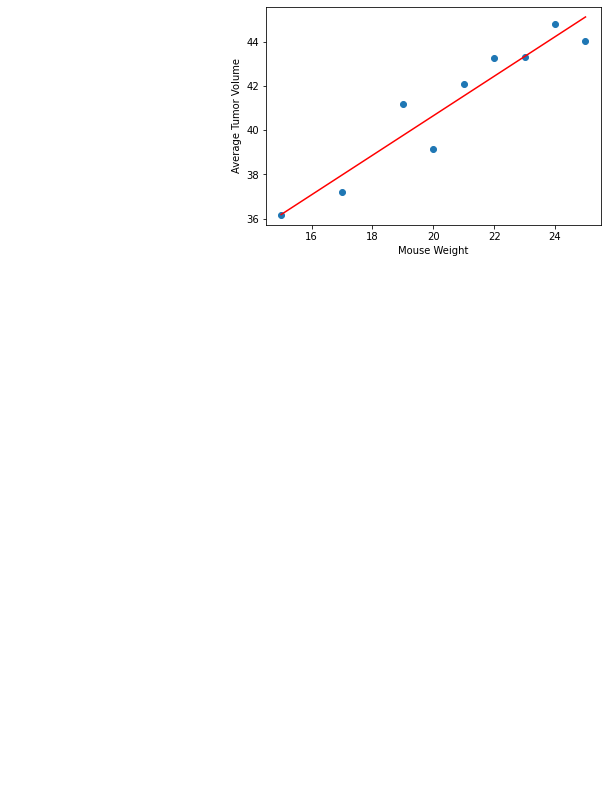

In [82]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# X & Y values
x_values = capo_grouped_plot["Weight (g)"]
y_values = capo_grouped_plot["Tumor Volume"]

#generating linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

#finding regression by x values times the slope and intercept
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show()
